# Primera Parte

In [6]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
import datetime
import string
import nltk

In [12]:
consumer_Key = 'R1QvArr26PTbzhLPSMnHqvBlS'
consumer_secret = 'zt5BpNcPMpMOwPSuBue9arNnRh9SBsbP3jC6MwgVAHc1BQ4ToZ'
access_token = '1389194574162272259-V3ZQWniZ72BGCZWnGrEW39VYxA9shU'
access_token_Secret = '68P8W46ZfhJEnS2IWya4g7378vFCYEHQegxzVZ5dSeoTj'

In [13]:
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_Key, consumer_secret)
auth.set_access_token(access_token, access_token_Secret)
 
# creation of the actual interface, using authentication
api = tweepy.API(auth)

In [14]:
list_tweets = tweepy.Cursor(api.search, q="#disculpateABCCOLOR",tweet_mode='extended', lang='es').items(300)

In [15]:
output = []
for tweet in list_tweets:
    text = tweet._json["full_text"]
    print(text)
    name = tweet.user.name
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'text' : text, 'name':name,'favourite_count' : favourite_count, 'retweet_count':retweet_count, 'created_at' : created_at}
    output.append(line)

RT @alexandra__1114: "No son buenos en lo que hacen"
- BTS primer acto coreano en tener un performance y nominación en los GRAMMYS
- BTS x…
@mikeotr  Todo el ARMY está esperando tus disculpas, así que puedes empezar.
Y responsabilizate de tus acciones y palabras. No digas que fue un "chiste", cuando claramente todos sabemos que no tienes respeto alguno.
#DisculpateMikeSilvero 
#DisculpateABCCOLOR https://t.co/45pys3pyul
RT @angel_regiz: @mikeotr A nadie le interesa de lo que hablas. ¡Así que cierra la boca!!, que aquí, nadie pidió tu opinión.
#DisculpateMik…
RT @GemsJinnie: ¿Porqué personas como Mike Silvero siguen siendo periodistas? A S C O #DisculpateABCCOLOR #DisculpateMikeSilvero
RT @justwant_a_rj: Horror con la xenofobia disfrazada de "humor y sarcasmo" de Mike Silvero, cuántos años tienes? 7? que no sabes diferenci…
RT @ARMY_colombia7: "Aceptaremos humildemente las críticas y los juicios pero no nos quedaremos callados ante lo irracional de la sociedad"…
RT @BadMundialito: 7° gr

In [16]:
df = pd.DataFrame(output)
df.to_csv('ABCDigital.csv')

In [17]:
df

,text,name,favourite_count,retweet_count,created_at
0,"RT @alexandra__1114: ""No son buenos en lo que ...",Fake Love,0,3,2021-06-19 22:39:09
1,@mikeotr Todo el ARMY está esperando tus disc...,BTS TUS PATRONES👑,1,0,2021-06-19 22:27:49
2,RT @angel_regiz: @mikeotr A nadie le interesa ...,BTS TUS PATRONES👑,0,3,2021-06-19 22:19:50
3,RT @GemsJinnie: ¿Porqué personas como Mike Sil...,Najheli Hilen Fernández,0,20,2021-06-19 22:06:22
4,RT @justwant_a_rj: Horror con la xenofobia dis...,Najheli Hilen Fernández,0,611,2021-06-19 22:04:19
...,...,...,...,...,...
295,@YuHyunSook3 @mikeotr Discúlpate como es debid...,RomiDaf,0,0,2021-06-18 23:03:59
296,RT @loveinthemilky1: El Mike Silvero que no se...,Jin,0,61,2021-06-18 23:00:55
297,RT @ChimmySun: Una vez que k-army hace lo posi...,Jin,0,64,2021-06-18 23:00:37
298,RT @glotstin: Ningún profesional rebajaría el ...,Jin,0,22,2021-06-18 22:59:15


# Análisis de sentimiento

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df=pd.read_csv("ABCDigital.csv")

In [21]:
df['polaridad']=df['text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [22]:
df

,Unnamed: 0,text,name,favourite_count,retweet_count,created_at,polaridad
0,0,"RT @alexandra__1114: ""No son buenos en lo que ...",Fake Love,0,3,2021-06-19 22:39:09,0.0
1,1,@mikeotr Todo el ARMY está esperando tus disc...,BTS TUS PATRONES👑,1,0,2021-06-19 22:27:49,0.0
2,2,RT @angel_regiz: @mikeotr A nadie le interesa ...,BTS TUS PATRONES👑,0,3,2021-06-19 22:19:50,0.0
3,3,RT @GemsJinnie: ¿Porqué personas como Mike Sil...,Najheli Hilen Fernández,0,20,2021-06-19 22:06:22,0.0
4,4,RT @justwant_a_rj: Horror con la xenofobia dis...,Najheli Hilen Fernández,0,611,2021-06-19 22:04:19,0.0
...,...,...,...,...,...,...,...
295,295,@YuHyunSook3 @mikeotr Discúlpate como es debid...,RomiDaf,0,0,2021-06-18 23:03:59,0.0
296,296,RT @loveinthemilky1: El Mike Silvero que no se...,Jin,0,61,2021-06-18 23:00:55,0.0
297,297,RT @ChimmySun: Una vez que k-army hace lo posi...,Jin,0,64,2021-06-18 23:00:37,0.0
298,298,RT @glotstin: Ningún profesional rebajaría el ...,Jin,0,22,2021-06-18 22:59:15,0.0


In [23]:
print("Polaridad")
print("Maximo valor ",df['polaridad'].max())
print("Mimimo valor ",df['polaridad'].min())
print("Valor medio ",df['polaridad'].mean())

Polaridad
Maximo valor  1.0
Mimimo valor  -0.8
Valor medio  -0.023666666666666673


In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [25]:
df[['polaridad','subjetividad']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
       df.loc[index, 'sentiment'] = "neutral"
    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp

df.head(5)

,Unnamed: 0,text,name,favourite_count,retweet_count,created_at,polaridad,subjetividad,sentiment,neg,neu,pos,compound
0,0,"RT @alexandra__1114: ""No son buenos en lo que ...",Fake Love,0,3,2021-06-19 22:39:09,0.0,0.0,negative,0.091,0.909,0.00,-0.2960
1,1,@mikeotr Todo el ARMY está esperando tus disc...,BTS TUS PATRONES👑,1,0,2021-06-19 22:27:49,0.0,0.0,negative,0.118,0.882,0.00,-0.5267
2,2,RT @angel_regiz: @mikeotr A nadie le interesa ...,BTS TUS PATRONES👑,0,3,2021-06-19 22:19:50,0.0,0.0,neutral,0.000,1.000,0.00,0.0000
3,3,RT @GemsJinnie: ¿Porqué personas como Mike Sil...,Najheli Hilen Fernández,0,20,2021-06-19 22:06:22,0.0,0.0,neutral,0.000,1.000,0.00,0.0000
4,4,RT @justwant_a_rj: Horror con la xenofobia dis...,Najheli Hilen Fernández,0,611,2021-06-19 22:04:19,0.0,0.0,negative,0.237,0.683,0.08,-0.6322


In [26]:
def cleanTxtNew(text):
    text = re.sub(':', '', text) 
    text = re.sub('"', '', text)
    text = re.sub('|', '', text)
    text = re.sub('_', '', text)
    text = re.sub('@[0-9A-Za-z]+', '', text)
    text = re.sub(r'[0-9]+', '', text) 
    text = re.sub(',', '', text)
    text = re.sub('RT[\s]+', '', text)
    text = re.sub('@[A-Za-z0–9]+', '', text)
    text = re.sub('#', '', text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('https\/\/\S+', '', text)
    text = re.sub('UNA', '', text)
    text = re.sub('la', '', text)
    text = re.sub('que', '', text)
    text = re.sub('de', '', text)
    text = re.sub('para', '', text)
    text = re.sub('se', '', text)
    text = re.sub('en', '', text)
    text = re.sub('lo', '', text)
    text = re.sub('el', '', text)
    text = re.sub('un', '', text)
    text = re.sub('como', '', text)
    text = re.sub('si', '', text)
    text = re.sub('pero', '', text)
    return text
df['text'] = df['text'].apply(lambda x: cleanTxtNew(x))

In [37]:
df.head(10)

,Unnamed: 0,text,name,favourite_count,retweet_count,created_at,polaridad,subjetividad,sentiment,neg,neu,pos,compound
0,0,No son buos hac- BTS primer acto coreano t...,Fake Love,0,3,2021-06-19 22:39:09,0.0,0.0,negative,0.091,0.909,0.00,-0.2960
1,1,Todo ARMY está esperando tus disculpas así ...,BTS TUS PATRONES👑,1,0,2021-06-19 22:27:49,0.0,0.0,negative,0.118,0.882,0.00,-0.5267
2,2,A nadie le interesa habs. ¡Así cierra boc...,BTS TUS PATRONES👑,0,3,2021-06-19 22:19:50,0.0,0.0,neutral,0.000,1.000,0.00,0.0000
3,3,¿Porqué personas Mike Silvero gu do periodist...,Najheli Hilen Fernández,0,20,2021-06-19 22:06:22,0.0,0.0,neutral,0.000,1.000,0.00,0.0000
4,4,Horror con xofobia disfrazada humor y sarcas...,Najheli Hilen Fernández,0,611,2021-06-19 22:04:19,0.0,0.0,negative,0.237,0.683,0.08,-0.6322
5,5,Aceptaremos humilmte s críticas y s juicios n...,María Martínez,0,13,2021-06-19 21:54:26,0.0,0.0,negative,0.109,0.891,0.00,-0.2960
6,6,° grupo canciones BadBnyBuscando mejor tema...,Mundialito Bad Bunny,0,1,2021-06-19 21:35:48,0.0,0.0,neutral,0.000,1.000,0.00,0.0000
7,7,“La educación es arma más porosa pues usar ...,Yamileth⁷☁️🖤,0,692,2021-06-19 21:29:08,0.0,0.0,neutral,0.000,1.000,0.00,0.0000
8,8,Si no gusta BTS tonces mantén boca cerrada y ...,Ceidy,0,0,2021-06-19 21:27:53,0.0,0.0,negative,0.148,0.852,0.00,-0.6808
9,9,abc su éxito es manipudo bts DisculpateABCCO...,𝓪𝓷𝓽𝓸𝓸,0,6464,2021-06-19 21:09:27,0.0,0.0,neutral,0.000,1.000,0.00,0.0000


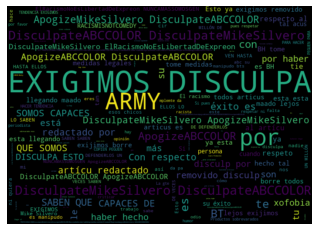

In [28]:
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=700, height=500, random_state=30, max_font_size=210).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
df_negative = df[df["sentiment"]=="negative"]
df_positive = df[df["sentiment"]=="positive"]
df_neutral = df[df["sentiment"]=="neutral"]

In [30]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
count_values_in_column(df,"sentiment")

,Total,Percentage
neutral,175,58.33
negative,112,37.33
positive,13,4.33


In [31]:
def uno(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return total, percentage
aux1,aux2 = uno(df,"sentiment")

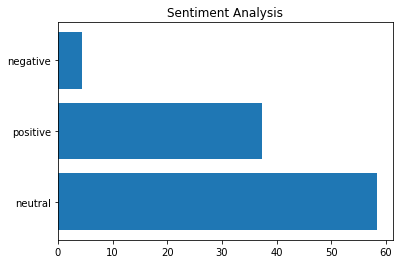

In [32]:
plt.title('Sentiment Analysis')
eje_x = ['neutral','positive','negative']
eje_y = [aux2[0],aux2[1],aux2[2]]
plt.barh(eje_x, eje_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


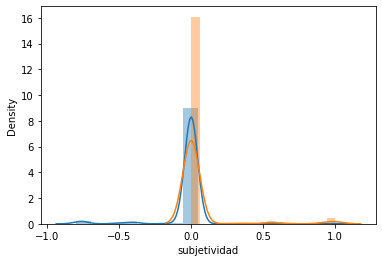

In [33]:

sns.distplot(df['polaridad'])
sns.distplot(df['subjetividad'])

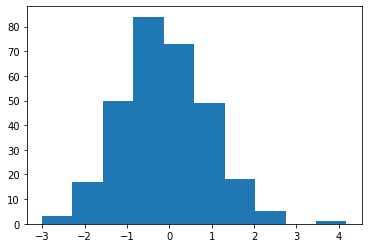

In [36]:
#Grafico de histograma
x = np.random.normal(df['compound'])
plt.hist(x)
plt.show() 